In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import copy
import pandas as pd
%matplotlib inline

In [2]:
import pyram as pr
pr.cwd('example_data')
pr.charge_lib('full')

Welcome to pyram: your Raman analysis library!
Charging pure spectra library, needs around a minute ....
Done. Good work!


In [11]:
pr.ls()

['.gitignore', '1-background_elimination', '.git', 'python_library', '2-spectrum_recognition', 'README.md']


txt0  ->  Sample01_D_6x4s_633nm_G1200_F100__Ox10.txt
txt1  ->  Sample01_F_10x5s_633nm_G1200_F0_1__Ox100LWD.txt
txt2  ->  Sample01_K_10x10s_633nm_G1200_F10__Ox100LWD.txt
txt3  ->  Sample01_A_10x6s_633nm_G1200_F100__Ox100LWD.txt
txt4  ->  Sample01_G_6x10s_633nm_G1200_F10__Ox100LWD.txt
txt5  ->  Sample01_B_10x30s_633nm_G1200_F1__Ox100LWD.txt
txt6  ->  Sample01_H_10x10s_633nm_G1200_F10__Ox100LWD.txt
txt7  ->  Si_calibration_A_60x1s_633nmnm_G1200_F100__Ox100.txt
txt8  ->  Sample01_C_10x20s_633nm_G1200_F10__Ox100LWD.txt
txt9  ->  Sample01_J_10x5s_633nm_G1200_F10__Ox100LWD.txt
txt10  ->  Sample01_I_10x10s_633nm_G1200_F25__Ox100LWD.txt
txt11  ->  Sample01_E_6x4s_633nm_G1200_F100__Ox100LWD.txt
sum(Y-XW) =  -4287276.725185195
message =  Optimization terminated successfully. (HiGHS Status 7: Optimal)
# of iter =  269


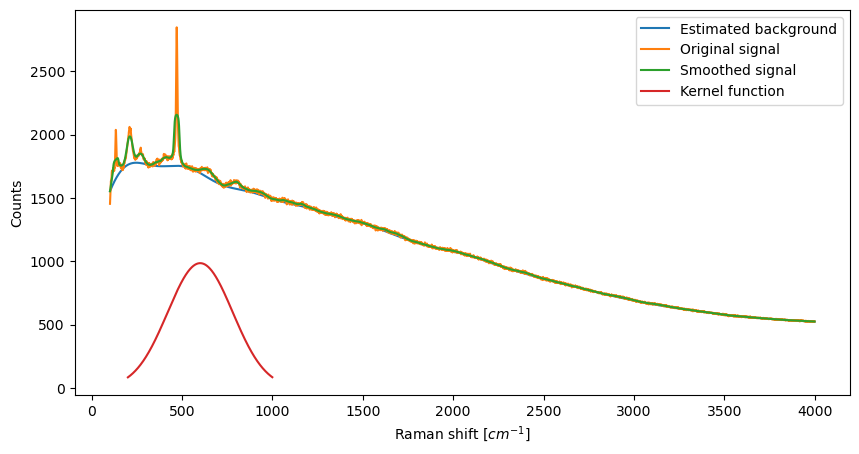

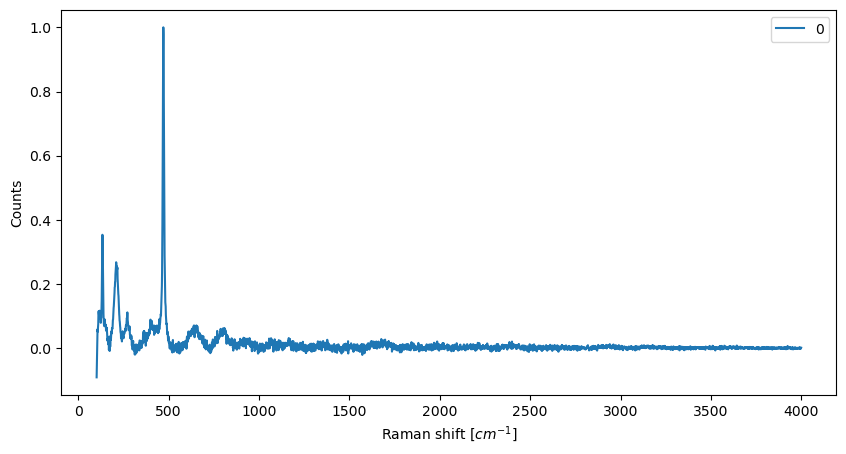

In [3]:
pr.set_alias()
S = pr.type2spectra('txt2')
S=pr.interpol(S)
S_nobkg= pr.bkg_subtraction(S,sigma=180,plot=True)
pr.plot(S_nobkg)

In [4]:
pr.search(S_nobkg,5,pre=False,first=10);

  alias                         name     match
0  sch0  Quartz__X080015__Raman__780  0.948996
1  sch1  Quartz__X080016__Raman__780  0.939118
2  sch2  Quartz__X080016__Raman__532  0.933323
3  sch3  Quartz__X080015__Raman__532  0.930551
4  sch4  Quartz__R060604__Raman__532  0.924438
5  sch5  Quartz__R060604__Raman__780  0.924137
6  sch6  Quartz__R040031__Raman__780  0.920993
7  sch7  Quartz__R050125__Raman__780  0.920442
8  sch8  Quartz__R040031__Raman__514  0.919003
9  sch9  Quartz__R050125__Raman__514  0.914642


trying N = 1 ; resulting in 27 combinations
trying N = 2 ; resulting in 351 combinations
best at N = 1


,combination,match
0,[Quartz__X080015__Raman__780],0.955966
1,[Quartz__X080016__Raman__780],0.955011
2,[Scotlandite__R060764__Raman__785],0.777427
3,[Sulphur__R040135__Raman__532],0.764633
4,[Epistolite__R070396__Raman__785],0.711785
5,[Cassiterite__R040072__Raman__785],0.562636
6,[Karpatite__R060162__Raman__785],0.492772
7,[Jokokuite__R070102__Raman__785],0.419263
8,[Nahcolite__R070237__Raman__785],0.304548
9,[Roubaultite__R080131__Raman__780],0.297573


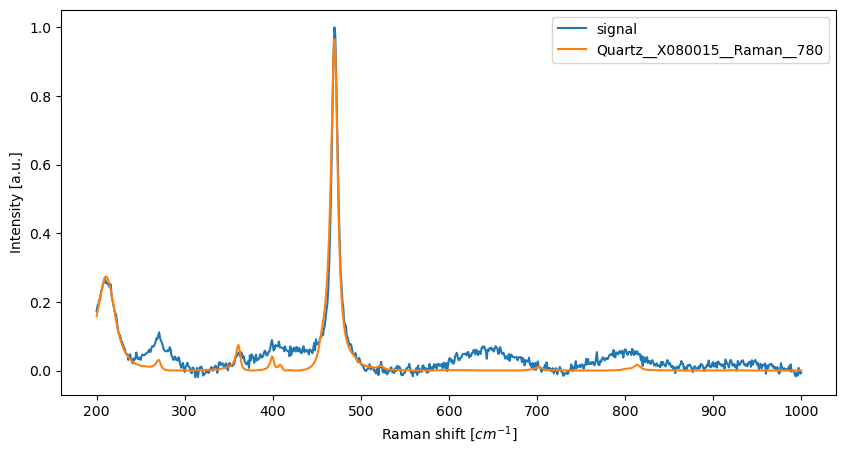

In [7]:
pr.NDsearch(S_nobkg, 5, improvement_th=0.1,verbose=False, set_min=200, set_max=1000)

  alias                          name
0  lib0  Sulphur__R050006__Raman__514


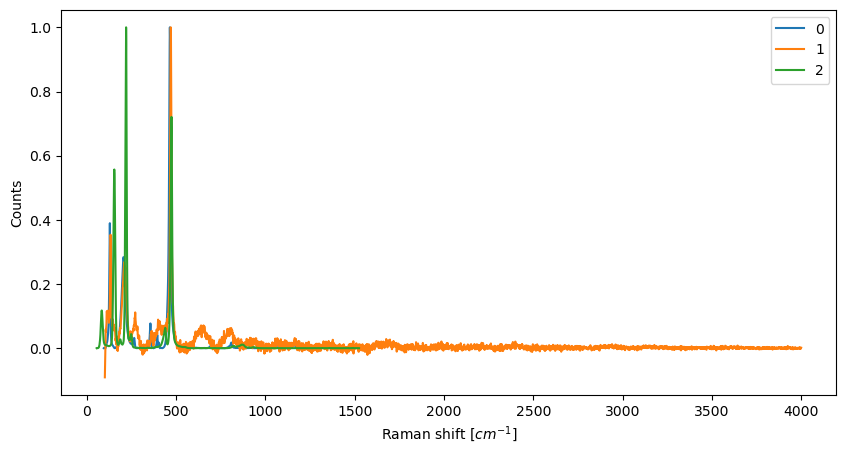

In [10]:
pr.plot(['sch0',S_nobkg])
pr.lib_names('Sulphur__R050006__Raman__514')
S=pr.type2spectra('lib0')
pr.replot(S)